open COM2 success
Initializing the PiScope...
Setting up the channels...
Plotting will start in a new window...
Quitting program.


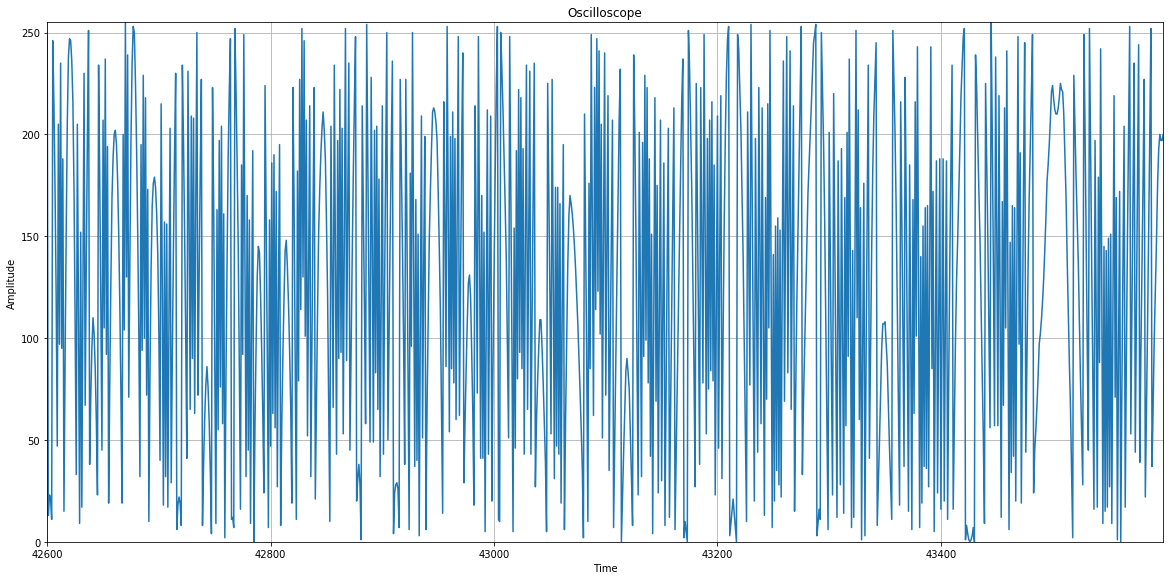

In [2]:
"""
The MIT License (MIT)

Copyright (c) 2014 Ankit Aggarwal <ankitaggarwal011@gmail.com>

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
"""

#!/usr/bin/env python

#from Adafruit_ADS1x15 import ADS1x15
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
import tkinter
import pylab
from time import sleep
import serial
import math
class Plotter:
  def __init__(self):
    print ("Initializing the PiScope...")
    return

  def setup(self, channels):
    print ("Setting up the channels...")
    self.channels = channels
    # Setup oscilloscope window
    self.root = tkinter.Tk()
    self.root.wm_title("PiScope")
    if len(self.channels) == 1:
      # Create x and y axis
      xAchse = pylab.arange(0, 4000, 1)
      yAchse = pylab.array([0]*4000)
      # Create the plot
      fig = pylab.figure(1)
      self.ax = fig.add_subplot(111)
      self.ax.set_title("COM2scope")
      self.ax.set_xlabel("Time")
      self.ax.set_ylabel("Amplitude")
      self.ax.axis([0, 4000, 0, 255])
    elif len(self.channels) == 2:
      # Create x and y axis
      xAchse = pylab.array([0]*4000)
      yAchse = pylab.array([0]*4000)
      # Create the plot
      fig = pylab.figure(1)
      self.ax = fig.add_subplot(111)
      self.ax.set_title("X-Y Plotter")
      self.ax.set_xlabel("Channel " + str(self.channels[0]))
      self.ax.set_ylabel("Channel " + str(self.channels[1]))
      self.ax.axis([0, 3.5, 0, 3.5])
    self.ax.grid(True)
    self.line1 = self.ax.plot(xAchse, yAchse, '-')
    # Integrate plot on oscilloscope window
    self.drawing = FigureCanvasTkAgg(fig, master=self.root)
    self.drawing.draw()
    self.drawing.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)
    # Setup navigation tools
    tool = NavigationToolbar2Tk(self.drawing, self.root)
    tool.update()
    self.drawing._tkcanvas.pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)
    return

  def plot(self):
    if len(self.channels) < 1 or len(self.channels) > 2:
      print ("The device can either operate as oscilloscope (1 channel) or x-y plotter (2 channels). Please operate accordingly.")
      self._quit()
    else:
      print ("Plotting will start in a new window...")
      try:
        # Setup Quit button
        button = tkinter.Button(master=self.root, text='Quit', command=self._quit)
        button.pack(side=tkinter.BOTTOM)
        # Setup speed and width
        self.scale1 = tkinter.Scale(master=self.root,label="View Width:", from_=3, to=1000, sliderlength=30, length=self.ax.get_window_extent().width, orient=tkinter.HORIZONTAL)
        self.scale2 = tkinter.Scale(master=self.root,label="Generation Speed:", from_=1, to=200, sliderlength=30, length=self.ax.get_window_extent().width, orient=tkinter.HORIZONTAL)
        self.scale2.pack(side=tkinter.BOTTOM)
        self.scale1.pack(side=tkinter.BOTTOM)
        self.scale1.set(4000)
        self.scale2.set(self.scale2['to']-10)
        self.root.protocol("WM_DELETE_WINDOW", self._quit)
        if len(self.channels) == 1:
          self.values = []
        else:
          self.valuesx = [0 for x in range(4000)]
          self.valuesy = [0 for y in range(4000)]
        self.root.after(4000, self.draw)
        tkinter.mainloop()
      except Exception as err:
        print ("Error. Try again.")
        print (err)
        self._quit()
    return

  def read(self):
    #print( "Reading channels...")
#     adc = ADS1x15()
#     # Read channels in single-ended mode (1 bit = 3mV)
#     if len(self.channels) == 1:
#       for i in range(1200):
#         self.values.append(adc.readADCSingleEnded(self.channels[0])*0.003)
#     elif len(self.channels) == 2:
#       self.valuesx.append(adc.readADCSingleEnded(self.channels[0])*0.003)
#       self.valuesy.append(adc.readADCSingleEnded(self.channels[1])*0.003)
    if len(self.channels) == 1:
        for i in range(200):
            self.values.append(int(serial.read().hex(), 16))
            #self.values.append(math.cos(i)*100)
        
        
    return

  def draw(self):
    self.read() #read current values
    #self.read_test() #testing reading
    #print( "Plotting...")
    if len(self.channels) == 1:
      NumberSamples = min(len(self.values), self.scale1.get())
      CurrentXAxis = pylab.arange(len(self.values) - NumberSamples, len(self.values), 1)
      self.line1[0].set_data(CurrentXAxis, pylab.array(self.values[-NumberSamples:]))
      self.ax.axis([CurrentXAxis.min(), CurrentXAxis.max(), -0, 255])
    elif len(self.channels) == 2:
      NumberSamplesx = min(len(self.valuesx), self.scale1.get())
      NumberSamplesy = min(len(self.valuesy), self.scale1.get())
      self.line1[0].set_data(pylab.array(self.valuesx[-NumberSamplesx:]), pylab.array(self.valuesy[-NumberSamplesy:]))
    self.drawing.draw()
    self.root.after(25, self.draw)
    return

  def _quit(self):
      print( "Quitting program.")
      self.root.quit()
      self.root.destroy()

    
serial = serial.Serial('COM2', 921600, timeout=3)  #/dev/ttyUSB0
if serial.isOpen() :
    print("open COM2 success")
else :
    print("open COM2 failed")
# Create oscilloscope
piscope = Plotter()

# Setup channels
piscope.setup([0])

# Start plotting 
piscope.plot()
